In [64]:
#WEEK 2 START
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#create pandas DataFrame for financial anomaly data
financial_df = pd.read_csv("financial_anomaly_data.csv")

In [3]:
#print first 5 columns of DataFrame
financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [4]:
#print class, RangeIndex, columns, non-null count, data type, and memory usage information
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Timestamp        216960 non-null  object 
 1   TransactionID    216960 non-null  object 
 2   AccountID        216960 non-null  object 
 3   Amount           216960 non-null  float64
 4   Merchant         216960 non-null  object 
 5   TransactionType  216960 non-null  object 
 6   Location         216960 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.6+ MB


In [5]:
#print shape of DataFrame
financial_df.shape

(217441, 7)

In [6]:
#print sum of null occurrences of each variable in DataFrame
print(financial_df.isnull().sum())

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64


In [7]:
#create a new DataFrame excluding null occurrences
new_financial_df = financial_df.dropna()

In [8]:
#print shape of new DataFrame
new_financial_df.shape

(216960, 7)

In [9]:
#verify that null occurrences were handled properly
print(new_financial_df.isnull().sum())

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
dtype: int64


In [10]:
#print number of unique occurrences of each variable in DataFrame
print(f"Number of unique Timestamp: {new_financial_df['Timestamp'].nunique()}")
print(f"Number of unique TransactionID: {new_financial_df['TransactionID'].nunique()}")
print(f"Number of unique AccountID: {new_financial_df['AccountID'].nunique()}")
print(f"Number of unique Amount: {new_financial_df['Amount'].nunique()}")
print(f"Number of unique Merchant: {new_financial_df['Merchant'].nunique()}")
print(f"Number of unique TransactionType: {new_financial_df['TransactionType'].nunique()}")
print(f"Number of unique Location: {new_financial_df['Location'].nunique()}")

Number of unique Timestamp: 216960
Number of unique TransactionID: 1999
Number of unique AccountID: 15
Number of unique Amount: 214687
Number of unique Merchant: 10
Number of unique TransactionType: 3
Number of unique Location: 5


In [11]:
#introduce new variables to DataFrame for analysis of certain variables' interactions
new_financial_df['AccountID/Merchant'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant']
new_financial_df['AccountID/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['TransactionID']
new_financial_df['AccountID/Merchant/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant'] + '_' + new_financial_df['TransactionID']
new_financial_df['TransactionType/Merchant'] = new_financial_df['TransactionType'].astype(str) + '_' + new_financial_df['Merchant']
new_financial_df['Location/TransactionType'] = new_financial_df['Location'].astype(str) + '_' + new_financial_df['TransactionType']
new_financial_df['Merchant/Location'] = new_financial_df['Merchant'].astype(str) + '_' + new_financial_df['Location']

C:\Users\brady\AppData\Local\Temp\ipykernel_23724\3560603646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['AccountID/Merchant'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['Merchant']
C:\Users\brady\AppData\Local\Temp\ipykernel_23724\3560603646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['AccountID/TransactionID'] = new_financial_df['AccountID'].astype(str) + '_' + new_financial_df['TransactionID']
C:\Users\brady\AppData\Local\Temp\ip

In [12]:
#verify that new variables have been created successfully
new_financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles


In [13]:
#convert Timestamp variable to a DateTime object
new_financial_df['Timestamp'] = pd.to_datetime(new_financial_df['Timestamp'], format='%d-%m-%Y %H:%M')

C:\Users\brady\AppData\Local\Temp\ipykernel_23724\585645809.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Timestamp'] = pd.to_datetime(new_financial_df['Timestamp'], format='%d-%m-%Y %H:%M')


In [14]:
#create distinct features for minute/hour of the day, day of the week, and month
new_financial_df['Minute'] = new_financial_df['Timestamp'].dt.minute
new_financial_df['Hour'] = new_financial_df['Timestamp'].dt.hour
new_financial_df['Day'] = new_financial_df['Timestamp'].dt.dayofweek
new_financial_df['Month'] = new_financial_df['Timestamp'].dt.month

C:\Users\brady\AppData\Local\Temp\ipykernel_23724\2535565269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Minute'] = new_financial_df['Timestamp'].dt.minute
C:\Users\brady\AppData\Local\Temp\ipykernel_23724\2535565269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Hour'] = new_financial_df['Timestamp'].dt.hour
C:\Users\brady\AppData\Local\Temp\ipykernel_23724\2535565269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [15]:
#verify again that new variables have been created successfully
new_financial_df.head(5)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location,Minute,Hour,Day,Month
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo,0,8,6,1
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London,1,8,6,1
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London,2,8,6,1
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London,3,8,6,1
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles,4,8,6,1


In [45]:
#Divide amount variable into appropriately-sized partitions
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, float('inf')]
labels = ['0-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000', '50001-60000', '60001-70000', '70001-80000', '80001-90000', '90001-100000', '100001+']
new_financial_df['Amount_Partitions'] = pd.cut(new_financial_df['Amount'], bins=bins, labels=labels)

C:\Users\brady\AppData\Local\Temp\ipykernel_23724\960733326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_financial_df['Amount_Partitions'] = pd.cut(new_financial_df['Amount'], bins=bins, labels=labels)


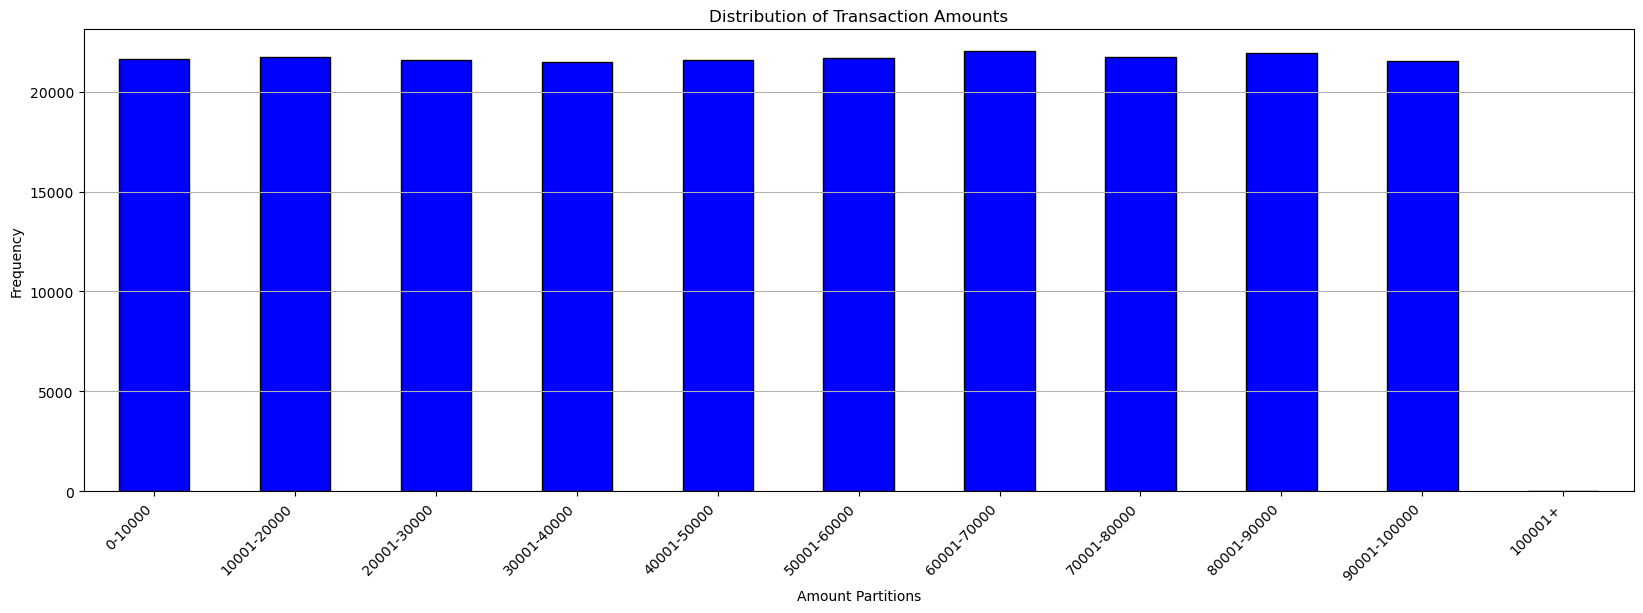

In [46]:
#Construct Bar Graph for distribution of transaction in each amount partition
partition_counts = new_financial_df['Amount_Partitions'].value_counts().reindex(labels)

plt.figure(figsize=(20, 6))
partition_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount Partitions')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

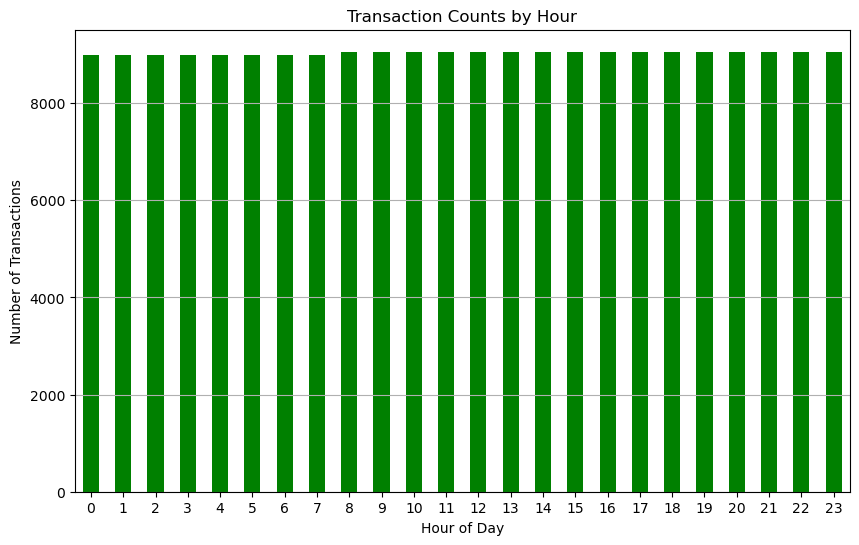

In [18]:
#Construct bar graph for total number of transactions per hour
hour_counts = new_financial_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
hour_counts.plot(kind='bar', color='green')
plt.title('Transaction Counts by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

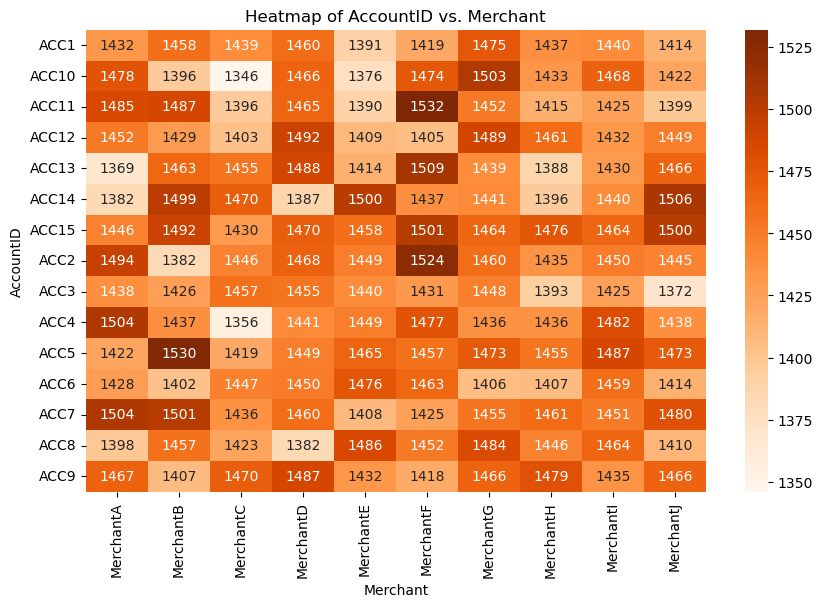

In [19]:
#Construct heat map to visualize total amounts of each combination of AccountID and Merchant (150 combinations)
pivot_table = pd.crosstab(new_financial_df['AccountID'], new_financial_df['Merchant'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Oranges', fmt='d')
plt.title('Heatmap of AccountID vs. Merchant')
plt.xlabel('Merchant')
plt.ylabel('AccountID')
plt.show()

In [20]:
#print a sample of the first 10 values of the cleaned dataset with new variables added
new_financial_df.head(10)

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location,AccountID/Merchant,AccountID/TransactionID,AccountID/Merchant/TransactionID,TransactionType/Merchant,Location/TransactionType,Merchant/Location,Minute,Hour,Day,Month,Amount_Partitions
0,2023-01-01 08:00:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo,ACC4_MerchantH,ACC4_TXN1127,ACC4_MerchantH_TXN1127,Purchase_MerchantH,Tokyo_Purchase,MerchantH_Tokyo,0,8,6,1,"90,001-100,000"
1,2023-01-01 08:01:00,TXN1639,ACC10,15607.89,MerchantH,Purchase,London,ACC10_MerchantH,ACC10_TXN1639,ACC10_MerchantH_TXN1639,Purchase_MerchantH,London_Purchase,MerchantH_London,1,8,6,1,"10,001-20,000"
2,2023-01-01 08:02:00,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London,ACC8_MerchantE,ACC8_TXN872,ACC8_MerchantE_TXN872,Withdrawal_MerchantE,London_Withdrawal,MerchantE_London,2,8,6,1,"60,001-70,000"
3,2023-01-01 08:03:00,TXN1438,ACC6,87.87,MerchantE,Purchase,London,ACC6_MerchantE,ACC6_TXN1438,ACC6_MerchantE_TXN1438,Purchase_MerchantE,London_Purchase,MerchantE_London,3,8,6,1,"0-10,000"
4,2023-01-01 08:04:00,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles,ACC6_MerchantI,ACC6_TXN1338,ACC6_MerchantI_TXN1338,Purchase_MerchantI,Los Angeles_Purchase,MerchantI_Los Angeles,4,8,6,1,"0-10,000"
5,2023-01-01 08:05:00,TXN1083,ACC15,13957.99,MerchantC,Transfer,London,ACC15_MerchantC,ACC15_TXN1083,ACC15_MerchantC_TXN1083,Transfer_MerchantC,London_Transfer,MerchantC_London,5,8,6,1,"10,001-20,000"
6,2023-01-01 08:06:00,TXN832,ACC9,4654.58,MerchantC,Transfer,Tokyo,ACC9_MerchantC,ACC9_TXN832,ACC9_MerchantC_TXN832,Transfer_MerchantC,Tokyo_Transfer,MerchantC_Tokyo,6,8,6,1,"0-10,000"
7,2023-01-01 08:07:00,TXN841,ACC7,1336.36,MerchantI,Withdrawal,San Francisco,ACC7_MerchantI,ACC7_TXN841,ACC7_MerchantI_TXN841,Withdrawal_MerchantI,San Francisco_Withdrawal,MerchantI_San Francisco,7,8,6,1,"0-10,000"
8,2023-01-01 08:08:00,TXN777,ACC10,9776.23,MerchantD,Transfer,London,ACC10_MerchantD,ACC10_TXN777,ACC10_MerchantD_TXN777,Transfer_MerchantD,London_Transfer,MerchantD_London,8,8,6,1,"0-10,000"
9,2023-01-01 08:09:00,TXN1479,ACC12,49522.74,MerchantC,Withdrawal,New York,ACC12_MerchantC,ACC12_TXN1479,ACC12_MerchantC_TXN1479,Withdrawal_MerchantC,New York_Withdrawal,MerchantC_New York,9,8,6,1,"40,001-50,000"


In [21]:
#print class, RangeIndex, columns, non-null count, data type, and memory usage information for the updated DataFrame
new_financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Timestamp                         216960 non-null  datetime64[ns]
 1   TransactionID                     216960 non-null  object        
 2   AccountID                         216960 non-null  object        
 3   Amount                            216960 non-null  float64       
 4   Merchant                          216960 non-null  object        
 5   TransactionType                   216960 non-null  object        
 6   Location                          216960 non-null  object        
 7   AccountID/Merchant                216960 non-null  object        
 8   AccountID/TransactionID           216960 non-null  object        
 9   AccountID/Merchant/TransactionID  216960 non-null  object        
 10  TransactionType/Merchant          216

In [22]:
#print number of unique occurrences of newly created variables
print(f"Number of unique AccountID/Merchant: {new_financial_df['AccountID/Merchant'].nunique()}")
print(f"Number of unique AccountID/TransactionID: {new_financial_df['AccountID/TransactionID'].nunique()}")
print(f"Number of unique AccountID/Merchant/TransactionID: {new_financial_df['AccountID/Merchant/TransactionID'].nunique()}")
print(f"Number of unique TransactionType/Merchant: {new_financial_df['TransactionType/Merchant'].nunique()}")
print(f"Number of unique Location/TransactionType: {new_financial_df['Location/TransactionType'].nunique()}")
print(f"Number of unique Merchant/Location: {new_financial_df['Merchant/Location'].nunique()}")
print(f"Number of unique Minute: {new_financial_df['Minute'].nunique()}")
print(f"Number of unique Hour: {new_financial_df['Hour'].nunique()}")
print(f"Number of unique Day: {new_financial_df['Day'].nunique()}")
print(f"Number of unique Month: {new_financial_df['Month'].nunique()}")
print(f"Number of unique Amount_Partitions: {new_financial_df['Amount_Partitions'].nunique()}")

Number of unique AccountID/Merchant: 150
Number of unique AccountID/TransactionID: 29967
Number of unique AccountID/Merchant/TransactionID: 154226
Number of unique TransactionType/Merchant: 30
Number of unique Location/TransactionType: 15
Number of unique Merchant/Location: 50
Number of unique Minute: 60
Number of unique Hour: 24
Number of unique Day: 7
Number of unique Month: 5
Number of unique Amount_Partitions: 11


In [23]:
new_financial_df.to_csv('Week_2_Data.csv', index=False)

In [24]:
#WEEK 2 END

In [25]:
#WEEK 3 START

In [68]:
#describe numerical data to better understand these columns
new_financial_df.describe()

,Timestamp,Amount,Minute,Hour,Day,Month
count,216960,216960.000000,216960.000000,216960.000000,216960.000000,216960.000000
mean,2023-03-17 15:59:30,50090.025108,29.500000,11.517699,2.973451,3.017699
min,2023-01-01 08:00:00,10.510000,0.000000,0.000000,0.000000,1.000000
25%,2023-02-07 23:59:45,25061.242500,14.750000,6.000000,1.000000,2.000000
50%,2023-03-17 15:59:30,50183.980000,29.500000,12.000000,3.000000,3.000000
75%,2023-04-24 07:59:15,75080.460000,44.250000,18.000000,5.000000,4.000000
max,2023-05-31 23:59:00,978942.260000,59.000000,23.000000,6.000000,5.000000
std,NaN,29097.905016,17.318142,6.918770,2.008659,1.421907


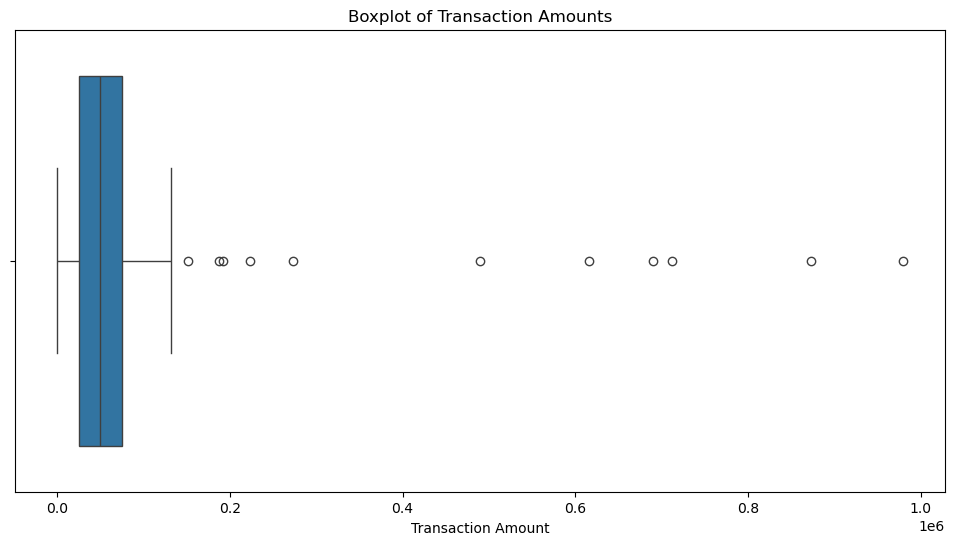

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Amount', data=new_financial_df)
plt.title('Boxplot of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

In [69]:
#print counts of each unique value in each column of the DataFrame
for column in new_financial_df.columns:
    column_count = new_financial_df[column].value_counts()
    print(column_count)

Timestamp
2023-01-01 08:00:00    1
2023-04-11 18:57:00    1
2023-04-11 18:33:00    1
2023-04-11 18:34:00    1
2023-04-11 18:35:00    1
                      ..
2023-02-20 13:23:00    1
2023-02-20 13:24:00    1
2023-02-20 13:25:00    1
2023-02-20 13:26:00    1
2023-05-31 23:59:00    1
Name: count, Length: 216960, dtype: int64
TransactionID
TXN838     139
TXN1768    139
TXN1658    139
TXN1389    138
TXN340     137
          ... 
TXN60       79
TXN891      78
TXN605      78
TXN201      73
TXN799      70
Name: count, Length: 1999, dtype: int64
AccountID
ACC15    14701
ACC5     14630
ACC7     14581
ACC2     14553
ACC9     14527
ACC14    14458
ACC4     14456
ACC11    14446
ACC12    14421
ACC13    14421
ACC8     14402
ACC1     14365
ACC10    14362
ACC6     14352
ACC3     14285
Name: count, dtype: int64
Amount
18010.00    3
34588.69    3
74109.74    3
86099.64    3
7309.50     3
           ..
56652.57    1
36336.36    1
49174.76    1
71557.91    1
65004.99    1
Name: count, Length: 214687, dty

In [71]:
#list variables to be one-hot encoded
one_hot_encoding = [
    'AccountID/Merchant',
    'TransactionType',
    'Location',
    'Amount_Partitions'
]

# Apply one-hot encoding
new_financial_df_encoded = pd.get_dummies(new_financial_df, columns=one_hot_encoding)

# Display the first few rows of the encoded DataFrame
print(new_financial_df_encoded.head())

            Timestamp TransactionID AccountID    Amount   Merchant  \
0 2023-01-01 08:00:00       TXN1127      ACC4  95071.92  MerchantH   
1 2023-01-01 08:01:00       TXN1639     ACC10  15607.89  MerchantH   
2 2023-01-01 08:02:00        TXN872      ACC8  65092.34  MerchantE   
3 2023-01-01 08:03:00       TXN1438      ACC6     87.87  MerchantE   
4 2023-01-01 08:04:00       TXN1338      ACC6    716.56  MerchantI   

  AccountID/TransactionID AccountID/Merchant/TransactionID  \
0            ACC4_TXN1127           ACC4_MerchantH_TXN1127   
1           ACC10_TXN1639          ACC10_MerchantH_TXN1639   
2             ACC8_TXN872            ACC8_MerchantE_TXN872   
3            ACC6_TXN1438           ACC6_MerchantE_TXN1438   
4            ACC6_TXN1338           ACC6_MerchantI_TXN1338   

  TransactionType/Merchant Location/TransactionType      Merchant/Location  \
0       Purchase_MerchantH           Tokyo_Purchase        MerchantH_Tokyo   
1       Purchase_MerchantH          London_Purchas

In [72]:
#print DataFrame info to maintain understanding of DataFrame properties
new_financial_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216960 entries, 0 to 216959
Columns: 183 entries, Timestamp to Amount_Partitions_100001+
dtypes: bool(169), datetime64[ns](1), float64(1), int32(4), object(8)
memory usage: 56.5+ MB


In [59]:
#Retrieve one-hot encoded columns
account_merchant_columns = [col for col in new_financial_df_encoded.columns if 'AccountID/Merchant_' in col]
transaction_type_columns = [col for col in new_financial_df_encoded.columns if 'TransactionType_' in col]
location_columns = [col for col in new_financial_df_encoded.columns if 'Location_' in col]
amount_partitions_columns = [col for col in new_financial_df_encoded.columns if 'Amount_Partitions_' in col]

# Create a dictionary to store correlations
correlation_results = {}

# Iterate through each pair of one-hot encoded columns to compute correlations
for account_merchant in account_merchant_columns:
    for transaction_type in transaction_type_columns:
        correlation1 = new_financial_df_encoded[account_merchant].corr(new_financial_df_encoded[transaction_type])
        correlation_results[(account_merchant, transaction_type)] = correlation1

for account_merchant in account_merchant_columns:
    for location in location_columns:
        correlation2 = new_financial_df_encoded[account_merchant].corr(new_financial_df_encoded[location])
        correlation_results[(account_merchant, location)] = correlation2

for account_merchant in account_merchant_columns:
    for amount_partitions in amount_partitions_columns:
        correlation3 = new_financial_df_encoded[account_merchant].corr(new_financial_df_encoded[amount_partitions])
        correlation_results[(account_merchant, amount_partitions)] = correlation3

for transaction_type in transaction_type_columns:
    for location in location_columns:
        correlation4 = new_financial_df_encoded[transaction_type].corr(new_financial_df_encoded[location])
        correlation_results[(transaction_type, location)] = correlation4

for transaction_type in transaction_type_columns:
    for amount_partitions in amount_partitions_columns:
        correlation5 = new_financial_df_encoded[transaction_type].corr(new_financial_df_encoded[amount_partitions])
        correlation_results[(transaction_type, amount_partitions)] = correlation5

for location in location_columns:
    for amount_partitions in amount_partitions_columns:
        correlation6 = new_financial_df_encoded[location].corr(new_financial_df_encoded[amount_partitions])
        correlation_results[(location, amount_partitions)] = correlation6
        
# Display the results
for (account_merchant, transaction_type), correlation1 in correlation_results.items():
    print(f'Correlation between {account_merchant} and {transaction_type}: {correlation1}')
    
for (account_merchant, location), correlation2 in correlation_results.items():
    print(f'Correlation between {account_merchant} and {location}: {correlation2}')
    
for (accout_merchant, amount_partitions), correlation3 in correlation_results.items():
    print(f'Correlation between {account_merchant} and {amount_partitions}: {correlation3}')
    
for (transaction_type, location), correlation4 in correlation_results.items():
    print(f'Correlation between {transaction_type} and {location}: {correlation4}')
    
for (transaction_type, amount_partitions), correlation5 in correlation_results.items():
    print(f'Correlation between {transaction_type} and {amount_partitions}: {correlation5}')
    
for (location, amount_partitions), correlation6 in correlation_results.items():
    print(f'Correlation between {location} and {amount_partitions}: {correlation6}')

Correlation between AccountID/Merchant_ACC10_MerchantA and TransactionType_Purchase: -0.0032207883322759832
Correlation between AccountID/Merchant_ACC10_MerchantA and TransactionType_Transfer: 0.001793310647927313
Correlation between AccountID/Merchant_ACC10_MerchantA and TransactionType_Withdrawal: 0.0014255429485284879
Correlation between AccountID/Merchant_ACC10_MerchantB and TransactionType_Purchase: 0.002105593961643959
Correlation between AccountID/Merchant_ACC10_MerchantB and TransactionType_Transfer: 0.0022736608589373534
Correlation between AccountID/Merchant_ACC10_MerchantB and TransactionType_Withdrawal: -0.004388247006339169
Correlation between AccountID/Merchant_ACC10_MerchantC and TransactionType_Purchase: -0.0028821986432473723
Correlation between AccountID/Merchant_ACC10_MerchantC and TransactionType_Transfer: -0.00019905063275461838
Correlation between AccountID/Merchant_ACC10_MerchantC and TransactionType_Withdrawal: 0.003084886992434382
Correlation between AccountID/

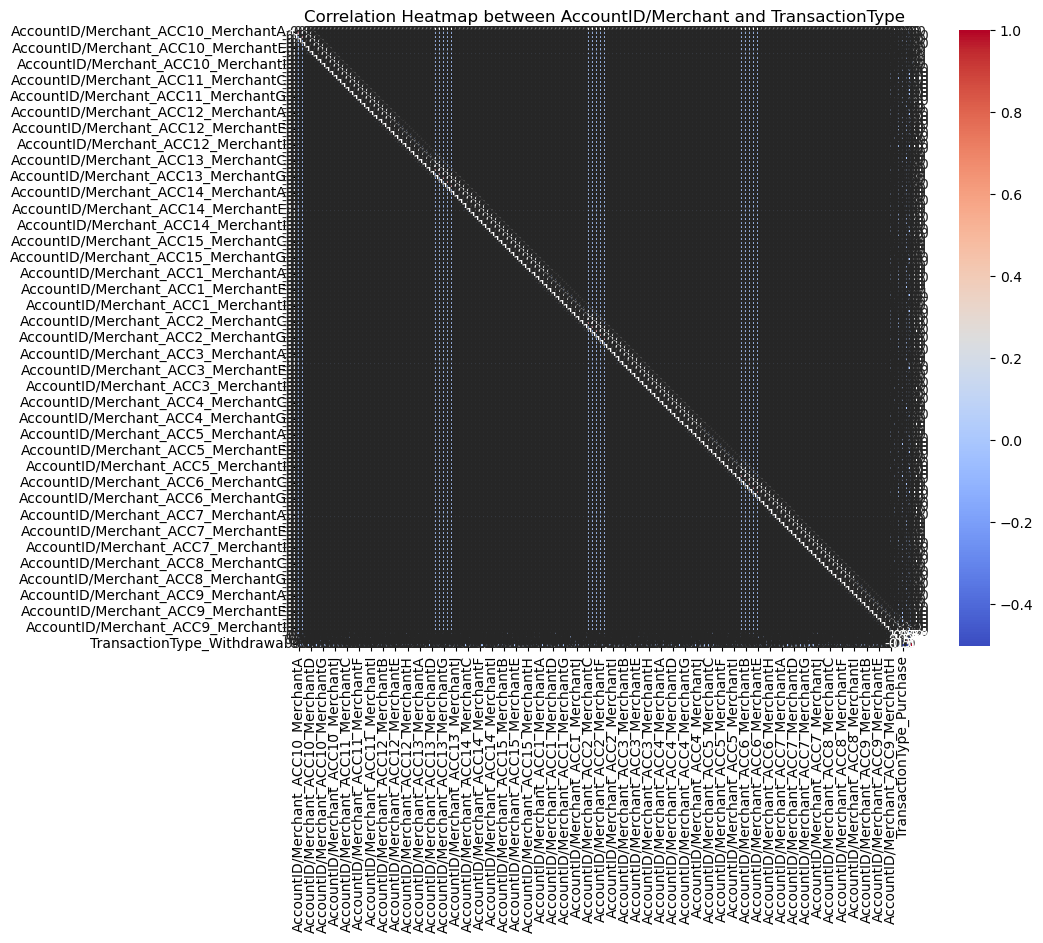

In [60]:
correlation_matrix = new_financial_df_encoded[account_merchant_columns + transaction_type_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap between AccountID/Merchant and TransactionType')
plt.show()

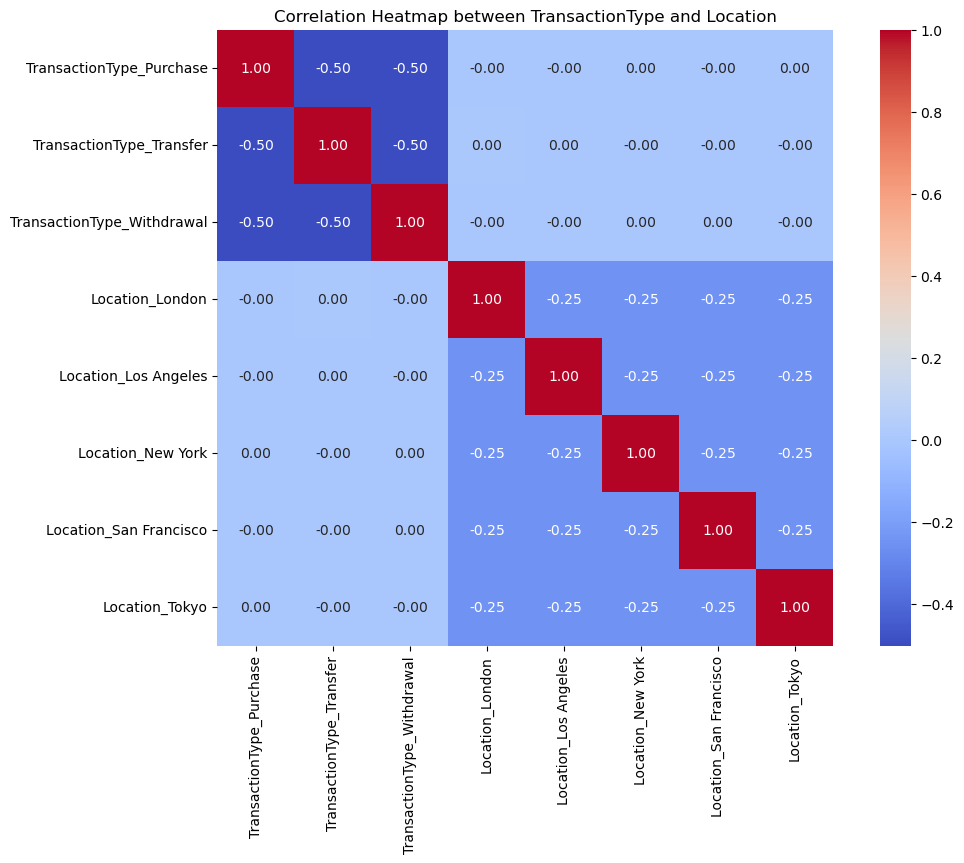

In [61]:
correlation_matrix = new_financial_df_encoded[transaction_type_columns + location_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap between TransactionType and Location')
plt.show()

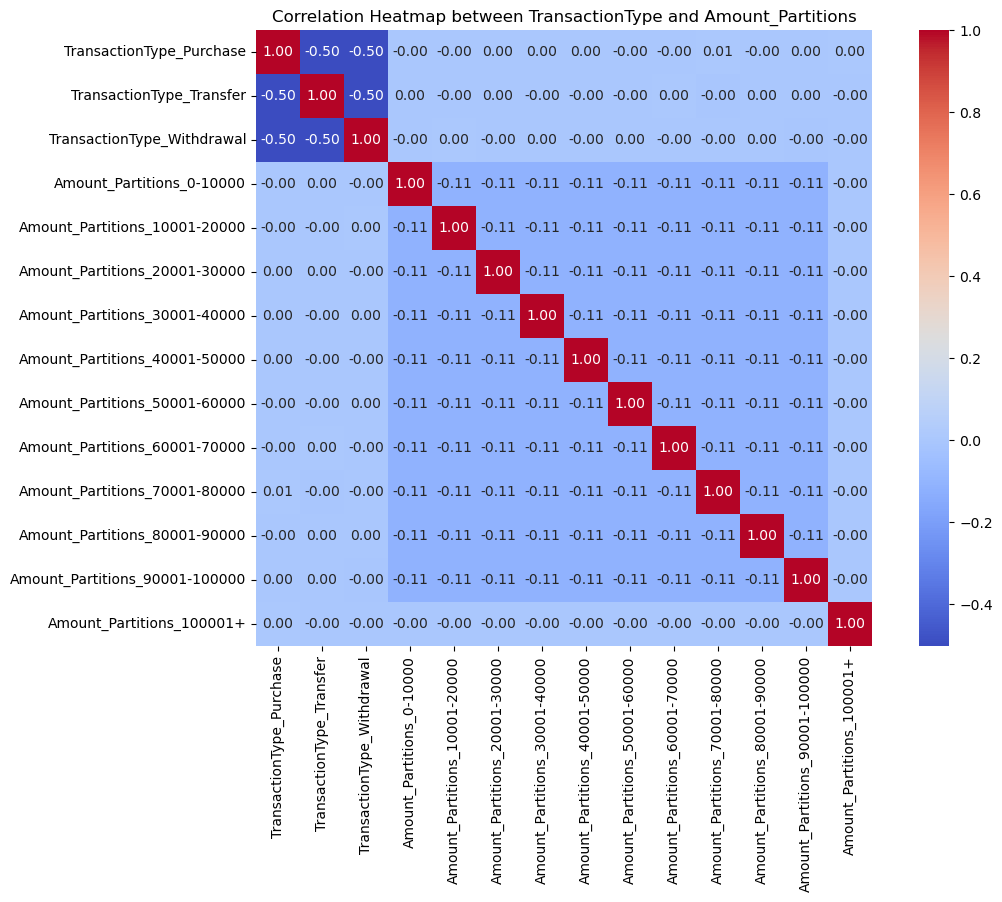

In [62]:
correlation_matrix = new_financial_df_encoded[transaction_type_columns + amount_partitions_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap between TransactionType and Amount_Partitions')
plt.show()

In [65]:
#create train set (70%) and temporary other set (30%)
train_df, temp_df = train_test_split(new_financial_df_encoded, test_size=0.30, random_state=1)

#split the leftover temp set into validation and test sets (50% of 30% each- 15% each)
validation_df, test_df = train_test_split(temp_df, test_size=0.50, random_state=42)

#verify shape of train, validation, and test DataFrames
print(f'Training set shape: {train_df.shape}')
print(f'Validation set shape: {validation_df.shape}')
print(f'Test set shape: {test_df.shape}')

Training set shape: (151872, 183)
Validation set shape: (32544, 183)
Test set shape: (32544, 183)


In [66]:
# Save the train set
train_df.to_csv('train_data.csv', index=False)

# Save the validation set
validation_df.to_csv('validation_data.csv', index=False)

# Save the test set
test_df.to_csv('test_data.csv', index=False)

print("DataFrames have been saved as CSV files.")

DataFrames have been saved as CSV files.


In [67]:
#END WEEK 3